<a href="https://colab.research.google.com/github/malphons/Project_Columbia_HFBootcamp/blob/main/Class_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Cross Validation

- We will be using the same lending club dataset from last lecture to illustrate cross validation.
- Some preprocessing steps to make sure that the data is ready to be trained.

In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd

df = pd.read_csv("https://drive.google.com/uc?id=1Ijs6Quta_ZAd3dsKWMvI6pxaHjpXgFoU")

y = df['loan_outcome']
X = df.drop('loan_outcome', axis=1)

# One-hot encode the categorical column
X = pd.get_dummies(X)

# Impute the missing values
imputer = KNNImputer(n_neighbors=5)
X = imputer.fit_transform(X)

In [ ]:
pd.DataFrame(X).sample(10)

,0,1,2,3,4,5,6,7,8
4296,20000.0,0.1875,62500.0,36.0,6.0,1.0,0.0,0.0,0.0
3018,12000.0,0.0762,42000.0,36.0,5.0,1.0,0.0,0.0,0.0
11613,4500.0,0.1655,40000.0,36.0,1.0,1.0,0.0,0.0,0.0
8843,21000.0,0.0603,89000.0,36.0,7.0,1.0,0.0,0.0,0.0
3125,16000.0,0.1064,87500.0,36.0,10.0,1.0,0.0,0.0,0.0
178,16000.0,0.1465,200000.0,36.0,5.0,1.0,0.0,0.0,0.0
4847,21000.0,0.1114,170000.0,36.0,0.5,0.0,0.0,0.0,1.0
11414,6025.0,0.1333,32500.0,36.0,5.0,0.0,0.0,0.0,1.0
6610,10000.0,0.1531,48000.0,36.0,2.0,0.0,0.0,1.0,0.0
6300,7000.0,0.0662,70000.0,36.0,2.0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Model Selection/Grid Search

- When we trained the logistic regression model, we didn't specify any hyper-parameters. For example, you can train the model with different `C`, which is the inverse of regularization strength; must be a positive float - smaller values specify stronger regularization.

- To find the best `C` to use for the logistic regression model, what we can do is to fit the model using some possible values of `C` and check the score on the test set.

In [ ]:
from sklearn.linear_model import LogisticRegression

for C in [0.0001, 0.001, 0.01, 0.1, 1]:
    logit = LogisticRegression(C=C, class_weight="balanced")
    logit.fit(X_train, y_train)
    print("C =", C)
    print("Test Score", logit.score(X_test, y_test), "\n")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C = 0.0001
Test Score 0.5202500679532481 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C = 0.001
Test Score 0.5368306605055722 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C = 0.01
Test Score 0.6050557216634955 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C = 0.1
Test Score 0.5485186191899973 

C = 1
Test Score 0.5444414243000816 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
sum(logit.predict(X_test))

2114

- This is why people often call the model selection process **grid search**: searching from the parameter grid for the one that produces the highest score. When searching for more than one paramter, the candidates form a grid.

- The problem with the approach above is that the dataset is not used efficiently. Some observations are never used for training and some are never used for testing. **Cross Validation** can help with that.

In [ ]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=3)
for training_idx, validation_idx in kfold.split(X_train, y_train):
    print(f"Traing set consists of {len(training_idx)} indexes.", training_idx)
    print(f"Validation set consists of {len(validation_idx)} indexes.", validation_idx)
    print("\n")

Traing set consists of 5721 indexes. [2861 2862 2863 ... 8579 8580 8581]
Validation set consists of 2861 indexes. [   0    1    2 ... 2858 2859 2860]


Traing set consists of 5721 indexes. [   0    1    2 ... 8579 8580 8581]
Validation set consists of 2861 indexes. [2861 2862 2863 ... 5719 5720 5721]


Traing set consists of 5722 indexes. [   0    1    2 ... 5719 5720 5721]
Validation set consists of 2860 indexes. [5722 5723 5724 ... 8579 8580 8581]




### Varying Distribution of The Dependent Variable

- One issue with random sampling is that the distributions of the dependent variable vary, especially when we deal with imbalanced dataset.

In [ ]:
kfold = KFold(n_splits=3)
for training_idx, validation_idx in kfold.split(X_train, y_train):
    print("The default rate of the training set of this fold is {}.".format(y_train.iloc[training_idx].mean()))
    print("The default rate of the validation set of this fold is {}.".format(y_train.iloc[validation_idx].mean()))
    print("\n")

The default rate of the training set of this fold is 0.18213599021150148.
The default rate of the validation set of this fold is 0.17441454037049983.


The default rate of the training set of this fold is 0.18318475790945637.
The default rate of the validation set of this fold is 0.17231737154840965.


The default rate of the training set of this fold is 0.17336595595945473.
The default rate of the validation set of this fold is 0.19195804195804195.




- `StratifiedKFold` comes in handy:

In [ ]:
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=3)
for training_idx, validation_idx in skfold.split(X_train, y_train):
    print("The default rate of the training set of this fold is {}.".format(y_train.iloc[training_idx].mean()))
    print("The default rate of the validation set of this fold is {}.".format(y_train.iloc[validation_idx].mean()))
    print("\n")

The default rate of the training set of this fold is 0.17951407096661423.
The default rate of the validation set of this fold is 0.17965746242572528.


The default rate of the training set of this fold is 0.17951407096661423.
The default rate of the validation set of this fold is 0.17965746242572528.


The default rate of the training set of this fold is 0.17965746242572528.
The default rate of the validation set of this fold is 0.17937062937062936.




### Grid Search with CV

In [ ]:
from sklearn.model_selection import GridSearchCV

skfold = StratifiedKFold(n_splits=3)
logit = LogisticRegression(class_weight="balanced", solver='liblinear')
params = {
    "C": [0.0001, 0.001, 0.01, 0.1, 1]
}

gs = GridSearchCV(logit, params, cv=skfold)
gs.fit(X_train, y_train)
gs.cv_results_['mean_test_score']

array([0.51235276, 0.51491646, 0.51934369, 0.52085832, 0.52097483])

- With Grid Search CV, we obtain our best `C`. You might have noticed that with `GridSearch`, `X_test` and `y_test` are not used. Both training and validation were done within the training data. The reason for that is that we need to keep a dataset that is not used to decide any part of our model.

In [ ]:
gs.best_params_

{'C': 1}

### K-means Clustering

- In practice, most kmeans packages perform the following greedy
algorithm, also known as Lloyd algorithm in computer science:
    1. Randomly assign an integer label, from 1 to K (where K is the number of clusters), to each of the observations. These serve as initial cluster assignments for the observations.
    2. Iterate until the cluster assignments stop changing:
        - i. For each of the K clusters, compute the cluster's new centroid.
        - ii. Assign each observation to the cluster whose centroid is closest (closest is measured using Euclidean distance).

![alt](https://drive.google.com/uc?export=view&id=1BxO9PrUaOEzBDta5KQ6ZE67wzhvLkb3C)

- We will be using a bank debit card dataset to illustrate how we can group the customers into clusters.

In [ ]:
import pandas as pd
df = pd.read_csv("https://drive.google.com/uc?id=1TwUbrpDkFKG3Avo3jzJiSyhkqgQQQZln")

In [ ]:
df.sample(10)

,expenditure,transfer
279,3254,2195
106,2729,1710
236,3163,2245
254,3318,2168
35,2893,2007
276,3343,2310
61,3025,2089
136,2861,1882
63,3058,1951
267,3110,2188


- There are no obvious boundaries to split this data set. How do we group the customers?

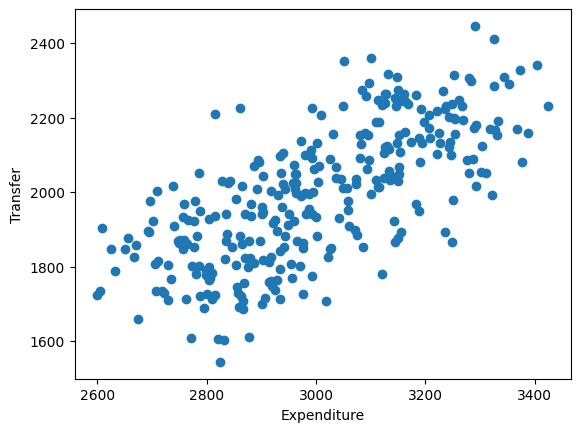

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df["expenditure"], df["transfer"])
plt.xlabel('Expenditure')
plt.ylabel('Transfer')
plt.show()

- Let's start with 2 clusters

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_init=10)

kmeans.set_params(n_clusters=2)
kmeans.fit(df)

KMeans(n_clusters=2, n_init=10)

In [ ]:
?KMeans

- Labels give you the cluster number of each observation.

In [ ]:
label = kmeans.labels_
label

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

- Centers give the coordinates of the centroid of each cluster.

In [ ]:
center = kmeans.cluster_centers_
center

array([[3168.10869565, 2145.33333333],
       [2858.9382716 , 1861.88888889]])

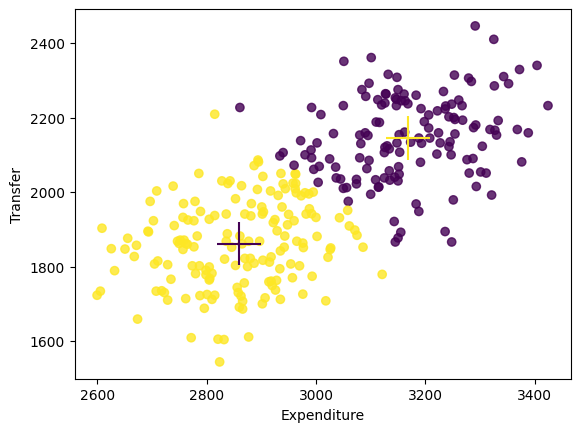

In [ ]:
plt.scatter(df["expenditure"], df["transfer"], c=label, alpha=0.8)
plt.scatter(center[:, 0], center[:, 1], c=[0, 1], marker='+', s=1000)
plt.xlabel('Expenditure')
plt.ylabel('Transfer')
plt.show()

- How about 3 clusters?

In [ ]:
kmeans.set_params(n_clusters=3)
kmeans.fit(df)
label = kmeans.labels_

- The centroids of clusters.

In [ ]:
center = kmeans.cluster_centers_
center

array([[3210.71875   , 2194.38541667],
       [2807.24271845, 1803.68932039],
       [2999.72277228, 1992.48514851]])

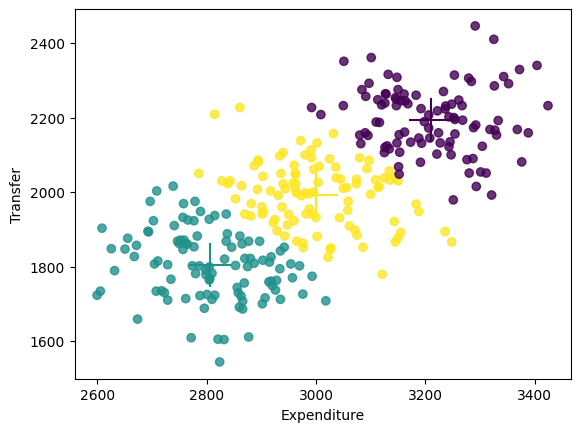

In [ ]:
plt.scatter(df["expenditure"], df["transfer"], c=label, alpha=0.8)
plt.scatter(center[:, 0], center[:, 1], c=[0, 1, 2], marker='+', s=1000)
plt.xlabel('Expenditure')
plt.ylabel('Transfer')
plt.show()

- How do we decide what is the best K to use? - **Elbow method**
- In the Elbow method, we are actually varying the number of clusters (K) from 1 - 10. For each value of K, we are calculating **WCSS (Within-Cluster Sum of Square)**. WCSS is the sum of the squared distance between each point and the centroid in a cluster.
- When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease.
- WCSS value is largest when K = 1. When we analyze the graph, we can see that the graph will rapidly change at a point and thus creating an elbow shape.
- From this point, the graph moves almost parallel to the X-axis. The K value corresponding to this point is the optimal value of K or an optimal number of clusters.

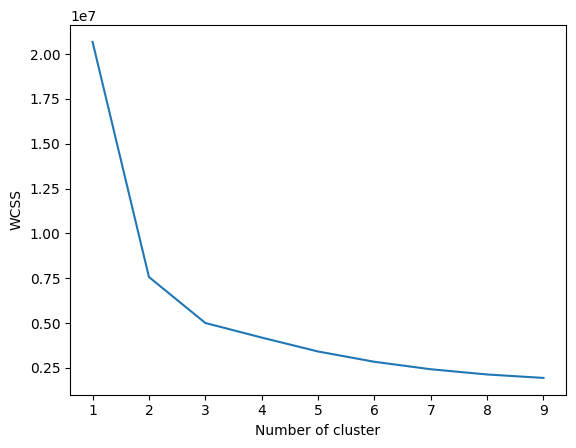

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, n_init=10).fit(df)
    # Inertia: Sum of distances of samples to their closest cluster center
    wcss.append(kmeans.inertia_)
plt.figure()
plt.plot(range(1,10), wcss)
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()

- The **Silhouette Coefficient** is another way of evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters.
- The Silhouette Coefficient is defined for each sample and is composed of two scores:
    - a: The mean distance between a sample and all other points in the same cluster.
    - b: The mean distance between a sample and all other points in the next nearest cluster.

- The Silhouette Coefficient for a single sample is then given as:

$$s=\frac{b-a}{max(a,b)}$$

- The Silhouette Coefficient for a set of samples is given as the mean of the Silhouette Coefficient for each sample.


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init=10).fit(df)
    print(silhouette_score(df, kmeans.labels_, metric='euclidean'))

0.5150505510877204
0.4221306958164245
0.38675557305088054
0.36213045657938514
0.3528080978491076
0.35297590858853395
0.3523658627506458
0.36354671771159713
